Source:
https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Pedestrians.csv", thousands = ",")
df.index = df.Date_Time.astype('datetime64')
df2 = df.drop_duplicates(subset = 'Date_Time', keep = False)

In [3]:
del df2['Sensor_ID']
del df2['Sensor_Name']
del df2['ID']
del df2['Date_Time']

In [4]:
df2.sort_index(inplace=True)

c:\Users\mi.martowicz\Anaconda3\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date_Time', ylabel='Hourly_Counts'>

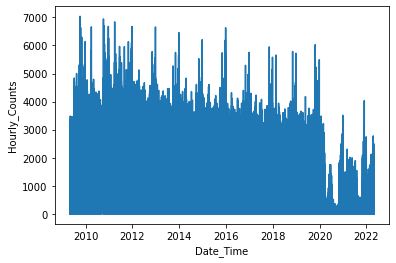

In [5]:
sns.lineplot(x=df2.index, y='Hourly_Counts', data=df2)

In [6]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52
2009-05-01 01:00:00,2009,May,1,Friday,1,34
2009-05-01 02:00:00,2009,May,1,Friday,2,19
2009-05-01 03:00:00,2009,May,1,Friday,3,14
2009-05-01 04:00:00,2009,May,1,Friday,4,15


In [7]:
df2.tail()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2022-04-30 19:00:00,2022,April,30,Saturday,19,489
2022-04-30 20:00:00,2022,April,30,Saturday,20,403
2022-04-30 21:00:00,2022,April,30,Saturday,21,310
2022-04-30 22:00:00,2022,April,30,Saturday,22,445
2022-04-30 23:00:00,2022,April,30,Saturday,23,244


In [8]:
import statsmodels.formula.api as sm

In [9]:
df2['Trend'] = range(1,len(df2)+1)

<ipython-input-9-34a127a3adb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [10]:
df2_in = df2[df2.index < "2020-01-01"]

In [11]:
model = sm.ols(formula="Hourly_Counts ~ Trend + C(Month) + C(Day) + C(Time)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Hourly_Counts   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:54:25   Log-Likelihood:            -6.7932e+05
No. Observations:               92563   AIC:                         1.359e+06
Df Residuals:                   92521   BIC:                         1.359e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               456.3148      8.211     55.576      0.000     440.222     472.407
C(Month)[T.August]     -108.2670      6.019    -17.986      0.000    -120.065     -96.469
C(Month)[T.December]    382.0090      6.019     63.462      0.000     370.211     393.807
C(Month)[T.February]    -57.0073      6.307     -9.038      0.000     -69.369     -44.645
C(Month)[T.January]     -43.5037      6.159     -7.063      0.000     -55.576     -31.432
C(Month)[T.July]        -41.7004      6.020     -6.927      0.000     -53.499     -29.901
C(Month)[T.June]        -98.7706      6.067    -16.279      0.000    -110.662     -86.879
C(Month)[T.March]       -36.2469      6.158     -5.886      0.000     -48.317     -24.176
C(Month)[T.May]        -122.4008      6.021    -20.328      0.000    -134.203    -110.599
C(Month)[T.November]     52.7870      6.066      8.702      0.000      40.898      64.676
C(Month)[T.October]     -37.7371      6.063     -6.224      0.000     -49.620     -25.854
C(Month)[T.September]   -66.5422      6.210    -10.715      0.000     -78.714     -54.371
C(Day)[T.Monday]       -289.6182      4.577    -63.276      0.000    -298.589    -280.647
C(Day)[T.Saturday]     -148.1080      4.577    -32.359      0.000    -157.079    -139.137
C(Day)[T.Sunday]       -394.6548      4.577    -86.216      0.000    -403.627    -385.683
C(Day)[T.Thursday]     -175.7566      4.583    -38.347      0.000    -184.740    -166.773
C(Day)[T.Tuesday]      -309.6232      4.579    -67.616      0.000    -318.598    -300.648
C(Day)[T.Wednesday]    -243.6581      4.583    -53.162      0.000    -252.641    -234.675
C(Time)[T.1]            -35.4016      8.483     -4.173      0.000     -52.028     -18.776
C(Time)[T.2]            -58.6945      8.485     -6.917      0.000     -75.326     -42.063
C(Time)[T.3]            -68.2935      8.483     -8.051      0.000     -84.920     -51.668
C(Time)[T.4]            -83.0732      8.483     -9.793      0.000     -99.699     -66.447
C(Time)[T.5]            -82.8570      8.483     -9.768      0.000     -99.483     -66.231
C(Time)[T.6]            -34.5448      8.483     -4.072      0.000     -51.171     -17.919
C(Time)[T.7]            110.2656      8.483     12.999      0.000      93.640     126.892
C(Time)[T.8]            433.0188      8.483     51.047      0.000     416.393     449.645
C(Time)[T.9]            676.9221      8.483     79.800      0.000     660.296     693.548
C(Time)[T.10]          1200.2065      8.483    141.489      0.000    1183.581    1216.832
C(Time)[T.11]          1833.1696      8.483    216.107      0.000    1816.544    1849.796
C(Time)[T.12]          2899.4087      8.483    341.803      0.000    2882.783    2916.035
C(Time)[T.13]          3273.6443      8.483    385.921      0.000    3257.018    3290.270
C(Time)[T.14]          

In [12]:
df2['PedestriansFC'] = results.predict(df2)

<ipython-input-12-825e3e0260db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PedestriansFC'] = results.predict(df2)


In [13]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,PedestriansFC
Date_Time,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,333.911760
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,298.507819
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,275.212673
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,265.611264
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,250.829309


<AxesSubplot:xlabel='Date_Time'>

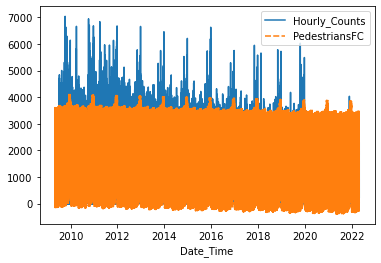

In [14]:
dfplot = df2.filter(['Hourly_Counts', 'PedestriansFC'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Date_Time'>

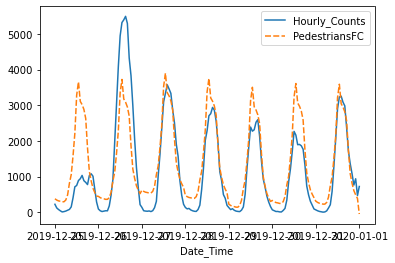

In [15]:
dfplot = df2.filter(['Hourly_Counts', 'PedestriansFC'])[(df2.index >= '2019-12-25') & (df2.index <= '2020-01-01')]
sns.lineplot(data=dfplot)

In [16]:
df3 = df2[df2.index < '2020-01-01']

In [17]:
insample_err = df3.Hourly_Counts - df3.PedestriansFC

In [18]:
insample_err

Date_Time
2009-05-01 00:00:00   -281.911760
2009-05-01 01:00:00   -264.507819
2009-05-01 02:00:00   -256.212673
2009-05-01 03:00:00   -251.611264
2009-05-01 04:00:00   -235.829309
                          ...    
2019-12-31 19:00:00    277.008497
2019-12-31 20:00:00    267.364473
2019-12-31 21:00:00    154.155243
2019-12-31 22:00:00    450.993459
2019-12-31 23:00:00     80.625297
Length: 92563, dtype: float64

In [19]:
df2[df2.index == '2022-01-01']

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,PedestriansFC
Date_Time,,,,,,,,
2022-01-01,2022,January,1,Saturday,0,286,110108,9.46827


In [20]:
errsmpl = np.random.choice(insample_err, 10000)

In [21]:
len(errsmpl)

10000

<AxesSubplot:ylabel='Count'>

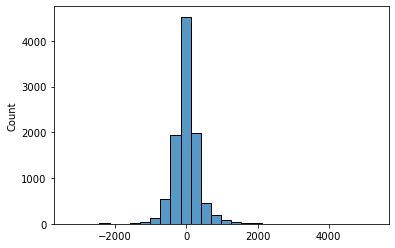

In [29]:
sns.histplot(data = errsmpl, bins=30)

<AxesSubplot:ylabel='Count'>

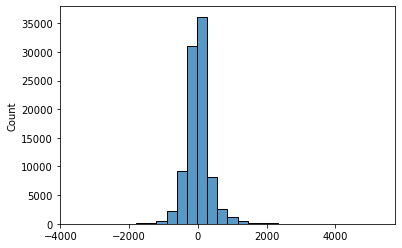

In [30]:
sns.histplot(data = insample_err, bins=30)

<AxesSubplot:xlabel='PedestriansFC', ylabel='Count'>

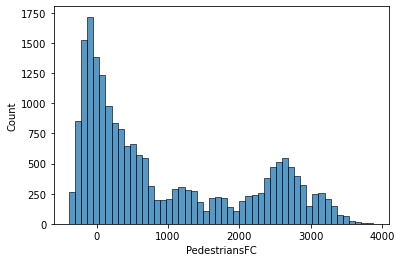

In [32]:
sns.histplot(data = df2.PedestriansFC[df2.index > '2019-12-31'], bins=50)

In [42]:
fc_distrtibution = df2[df2.index == '2022-01-01'].PedestriansFC.values + errsmpl

<AxesSubplot:ylabel='Count'>

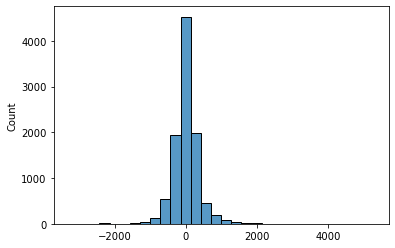

In [48]:
sns.histplot(fc_distrtibution, bins=30)

<AxesSubplot:ylabel='Count'>

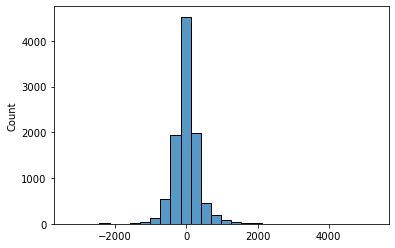

In [59]:
sns.histplot(x= errsmpl, data = df2.PedestriansFC[df2.index > '2022-01-01'], bins=30)

In [57]:
np.sum(np.abs(errsmpl) >= 539)/ len(errsmpl)

0.0997